Dataset Head:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

R2 Score: 0.8986489151417081
MAE: 1.4650601050102927


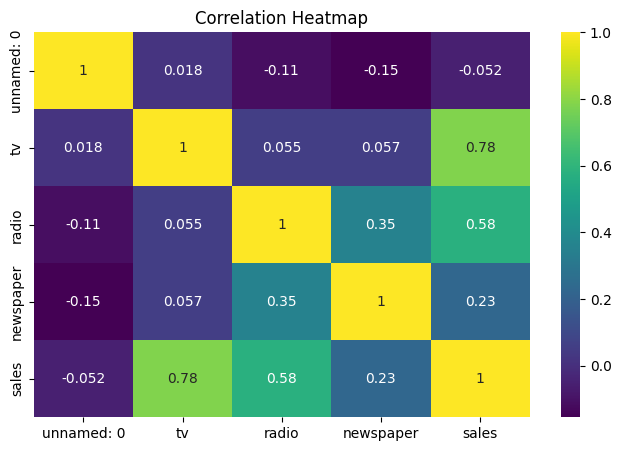

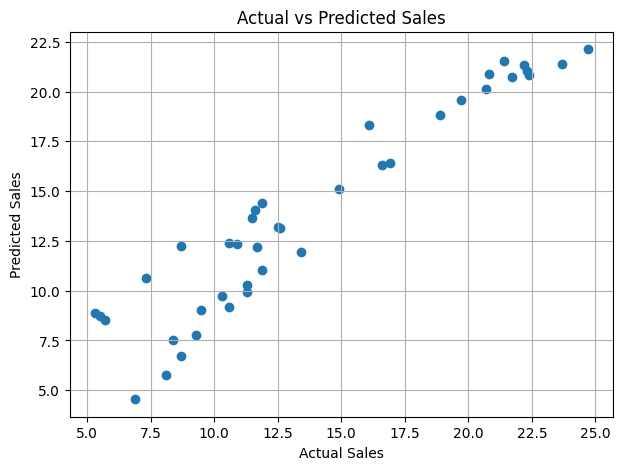


Forecast for last 5 samples:
[ 5.48317272  8.19778455 12.72863505 23.86690546 15.06843283]

Sales Prediction Task Completed.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 1. Load Dataset
df = pd.read_csv("Advertising.csv")
print("Dataset Head:")
print(df.head())

# 2. Basic Cleaning
df.columns = df.columns.str.strip().str.lower()

# Identify target
possible_targets = ["sales", "revenue", "units_sold"]
target_col = next((c for c in possible_targets if c in df.columns), None)

if target_col is None:
    raise ValueError("Dataset missing a valid sales/revenue target column.")

df = df.dropna(subset=[target_col])

# 3. Feature & Target Split
X = df.drop(columns=[target_col])
y = df[target_col]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# 4. Preprocessing Setup
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 5. Model Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train Model
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

print("\nR2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# 9. Correlation Heatmap (Good for internship submission)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

# 10. Actual vs Predicted Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

# 11. Forecasting next 5 values (dummy example)
try:
    example_input = X.tail(5)
    future_pred = model.predict(example_input)
    print("\nForecast for last 5 samples:")
    print(future_pred)
except:
    print("Forecasting skipped due to incompatible feature shape.")

print("\nSales Prediction Task Completed.")
